**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Daniel Campos da Silva

---

Engenheiro de conhecimento: 
Isabela Felix França

---


## Fazendo upload do dados do Kaggle

In [ ]:
# Faz upload do arquivo "kaggle.json" com API Token do perfil do usuário
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Testa se upload foi feito com sucesso
!ls

kaggle.json  sample_data


In [ ]:
# Move arquivo para a uma pasta e dá permissões ao sistema
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Fazendo download do dataset
! kaggle datasets download -d mariaren/covid19-healthy-diet-dataset

  0% 0.00/81.9k [00:00<?, ?B/s]
100% 81.9k/81.9k [00:00<00:00, 33.9MB/s]


In [ ]:
# Extraindo arquivos
!unzip covid19-healthy-diet-dataset.zip

covid19-healthy-diet-dataset.zip  kaggle.json  sample_data


In [ ]:
# Conferindo arquivos
!ls

covid19-healthy-diet-dataset.zip  kaggle.json
Fat_Supply_Quantity_Data.csv	  Protein_Supply_Quantity_Data.csv
Food_Supply_kcal_Data.csv	  sample_data
Food_Supply_Quantity_kg_Data.csv  Supply_Food_Data_Descriptions.csv


## Transferindo os dados para planilha

In [ ]:
import pandas as pd
 
# Cria dataframes do pandas a partir dos csvs
fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
kcal = pd.read_csv('Food_Supply_kcal_Data.csv')
kg = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')

In [ ]:
# Trocando legendas das colunas da tabela de gorduras
columns = list(fat.columns)

mapFat = {}
mapKg = {}
mapKcal = {}
mapProtein = {}

for i in range(1, 25):
  mapFat.update({columns[i] : "Fat - " + columns[i]})
  mapKg.update({columns[i] : "Kg - " + columns[i]})
  mapKcal.update({columns[i] : "Kcal - " + columns[i]})
  mapProtein.update({columns[i] : "Protein - " + columns[i]})

fat.rename(mapper = mapFat, axis = 1, inplace = True)
kg.rename(mapper = mapKg, axis = 1, inplace = True)
kcal.rename(mapper = mapKcal, axis = 1, inplace = True)
protein.rename(mapper = mapProtein, axis = 1, inplace = True)

In [ ]:
# Dropando dados redundantes ou desnecessários
dropLabels = columns[25:32]

fat.drop(labels = columns[31], axis = 1, inplace = True)
kg.drop(labels = dropLabels, axis = 1, inplace = True)
kcal.drop(labels = dropLabels, axis = 1, inplace = True)
protein.drop(labels = dropLabels, axis = 1, inplace = True)


In [ ]:
# Unindo as tabelas de acordo com o país

df = pd.merge(kg, kcal)
df = pd.merge(df, protein)
df = pd.merge(df, fat)

In [ ]:
df

,Country,Kg - Alcoholic Beverages,Kg - Animal fats,Kg - Animal Products,"Kg - Aquatic Products, Other",Kg - Cereals - Excluding Beer,Kg - Eggs,"Kg - Fish, Seafood",Kg - Fruits - Excluding Wine,Kg - Meat,...,Fat - Vegetal Products,Fat - Vegetable Oils,Fat - Vegetables,Fat - Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,34.7010,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,22.2995,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,33.6855,29.5211,0.1851,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,16.7548,5.6211,0.6373,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,37.4535,23.6312,0.1667,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,40.3939,15.2848,0.1567,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0


# Analisando relação entre os atributos

Para fazer a relação entre os valores, precisamos normalizá-los. Fazemos isso através da média e do desvio padrão.

In [ ]:
normalizado = df
normalizado = (normalizado-normalizado.mean())/normalizado.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


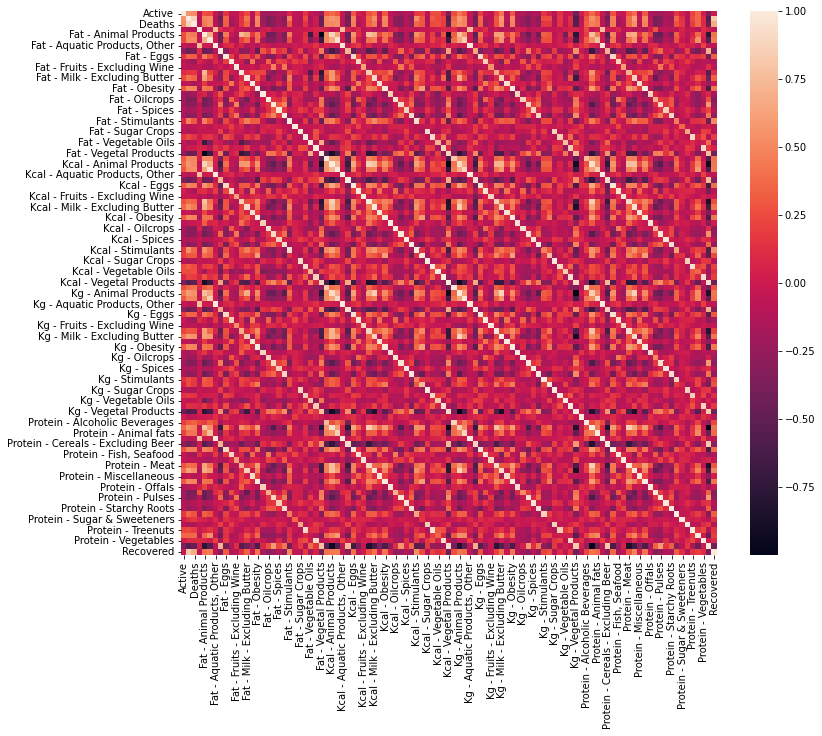

In [ ]:
# Fazendo o heatmap
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(normalizado.corr());

Nos chama à atenção inicialmente as diagonais claras, indicando uma correlação forte. Elas representam uma paridade entre o mesmo grupo de alimentos e suas características. É fácil ver que uma população que consome mais ovos tem uma porcentagem de origem de proteína, massa de alimento, kilocalorias e gorduras maiores para esse grupo alimentar. Há também relações antagônicas (em tom escuro) entre alguns alimentos, como a porcentagem de contribuição de gorduras animais e vegetais. Isso ocorre pois o aumento da distribuição de um implica na diminuição da distribuição do outro, pois compartilham um mesmo todo.

O que nos interessa está referente à COVID 19. Abaixo resumimos as principais relações:

* Mais mortes por COVID 19 =
 * Mais recuperações
 * Menos produtos vegetais (gordura, proteína, kg e kcal)
 * Mais produtos animais (gordura, proteína, kg e kcal)
* Mais recuperações da COVID 19 =
 * Mais mortes
 * Mais kilocalorias de estimulantes
 * Menos kilocalorias de produtos vegetais
 * Mais proteínas de produtos vegetais

Concluímos que uma dieta vegetariana é uma boa maneira de aumentar as recuperações e diminuir as mortes.